**Download the MNIST dataset and load it into your preferred development environment**

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


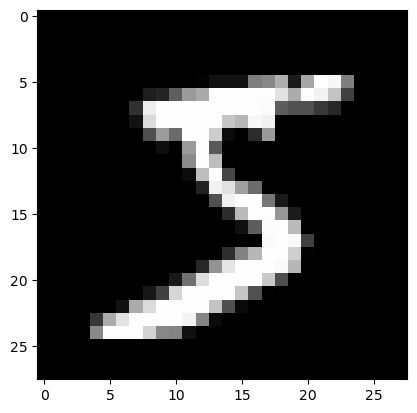

In [52]:
import keras
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28).astype('float32') / 255
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [53]:

# Normalize pixel values to the range of 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the images to a 1D array of 784 features (28x28)
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (48000, 784)
y_train shape: (48000,)
X_val shape: (12000, 784)
y_val shape: (12000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


**Implement a baseline model using traditional machine learning algorithms such as logistic regression**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.7445
Test Accuracy: 0.764


** Evaluate the baseline model's performance using appropriate evaluation metrics **

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_test, average='macro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_test, average='macro')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_test, average='macro')
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.764
Precision: 0.8110328602335717
Recall: 0.7555718116451559
F1 Score: 0.7466470170367491
Confusion Matrix:
[[ 939    3    2    8    0    0   21    3    4    0]
 [   0 1127    1    3    0    0    3    0    1    0]
 [  35  176  701   27   18    0   24   26   24    1]
 [  10   65   23  862    0    0    6   22   18    4]
 [   7   75    2    0  794    0   34   11    2   57]
 [  73  171    2  290   23  198   37   48   21   29]
 [  35   55   14    0   10    2  840    1    1    0]
 [   3   91   16    1    9    0    2  894    2   10]
 [  28  142   12  114    9    2   19   31  599   18]
 [  28   55    8   12   83    0    4  127    6  686]]


**Create an ensemble of three different machine learning algorithms**

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create individual models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Create an ensemble using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('svm', svm)
], voting='hard')

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_ensemble = ensemble_model.predict(X_val)

# Calculate accuracy on the validation set
ensemble_accuracy = accuracy_score(y_val, y_pred_ensemble)
print("Ensemble Validation Accuracy:", ensemble_accuracy)

# Make predictions on the test set
y_pred_ensemble_test = ensemble_model.predict(X_test)

# Calculate accuracy on the test set
ensemble_test_accuracy = accuracy_score(y_test, y_pred_ensemble_test)
print("Ensemble Test Accuracy:", ensemble_test_accuracy)

Ensemble Validation Accuracy: 0.97175
Ensemble Test Accuracy: 0.9733


**Combine the predictions of individual models using techniques such as averaging or voting**

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create individual models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Fit the individual models on the training data
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_decision_tree = decision_tree.predict(X_val)
y_pred_random_forest = random_forest.predict(X_val)
y_pred_svm = svm.predict(X_val)

# Combine predictions using voting
y_pred_combined = (y_pred_decision_tree + y_pred_random_forest + y_pred_svm) // 3

# Calculate accuracy on the validation set
combined_accuracy = accuracy_score(y_val, y_pred_combined)
print("Combined Validation Accuracy:", combined_accuracy)

# Make predictions on the test set
y_pred_decision_tree_test = decision_tree.predict(X_test)
y_pred_random_forest_test = random_forest.predict(X_test)
y_pred_svm_test = svm.predict(X_test)

# Combine predictions using average
y_pred_combined_test = (y_pred_decision_tree_test + y_pred_random_forest_test + y_pred_svm_test) // 3

# Calculate accuracy on the test set
combined_test_accuracy = accuracy_score(y_test, y_pred_combined_test)
print("Combined Test Accuracy:", combined_test_accuracy)

Combined Validation Accuracy: 0.8790833333333333
Combined Test Accuracy: 0.8877


**Evaluate the ensemble model's performance and compare it with the baseline model**

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics for the ensemble model
ensemble_accuracy = accuracy_score(y_test, y_pred_combined_test)
ensemble_precision = precision_score(y_test, y_pred_combined_test, average='macro')
ensemble_recall = recall_score(y_test, y_pred_combined_test, average='macro')
ensemble_f1 = f1_score(y_test, y_pred_combined_test, average='macro')
ensemble_confusion_mat = confusion_matrix(y_test, y_pred_combined_test)

# Calculate evaluation metrics for the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred_test)
baseline_precision = precision_score(y_test, y_pred_test, average='macro')
baseline_recall = recall_score(y_test, y_pred_test, average='macro')
baseline_f1 = f1_score(y_test, y_pred_test, average='macro')
baseline_confusion_mat = confusion_matrix(y_test, y_pred_test)

# Print ensemble model evaluation metrics
print("Ensemble Model Metrics:")
print("Accuracy:", ensemble_accuracy)
print("Precision:", ensemble_precision)
print("Recall:", ensemble_recall)
print("F1 Score:", ensemble_f1)
print("Confusion Matrix:")
print(ensemble_confusion_mat)

# Print baseline model evaluation metrics
print("\nBaseline Model Metrics:")
print("Accuracy:", baseline_accuracy)
print("Precision:", baseline_precision)
print("Recall:", baseline_recall)
print("F1 Score:", baseline_f1)
print("Confusion Matrix:")
print(baseline_confusion_mat)

Ensemble Model Metrics:
Accuracy: 0.8877
Precision: 0.8905319678278341
Recall: 0.8859859821555798
F1 Score: 0.8865101299261985
Confusion Matrix:
[[ 925   19   24    7    1    0    1    1    2    0]
 [   0 1105   10   14    2    2    1    1    0    0]
 [   2   20  904   41   53    4    4    2    2    0]
 [   0    0   43  897   39   16    8    4    3    0]
 [   0    0    2   23  854   84    4   10    2    3]
 [   2    3    0   29   65  746   41    4    1    1]
 [   3    2    3    0   35   39  871    4    1    0]
 [   1    4    9    7    8   42   13  936    7    1]
 [   2    3    2    2    4   23   91   52  794    1]
 [   1    5    3    4    8   14   22   73   34  845]]

Baseline Model Metrics:
Accuracy: 0.764
Precision: 0.8110328602335717
Recall: 0.7555718116451559
F1 Score: 0.7466470170367491
Confusion Matrix:
[[ 939    3    2    8    0    0   21    3    4    0]
 [   0 1127    1    3    0    0    3    0    1    0]
 [  35  176  701   27   18    0   24   26   24    1]
 [  10   65   23  86

**Design and implement multiple neural network architectures for handwritten digit recognition**

In [8]:
import numpy as np
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Reshape input data
X_train = np.reshape(X_train, (-1, 28, 28))
X_val = np.reshape(X_val, (-1, 28, 28))
X_test = np.reshape(X_test, (-1, 28, 28))

# Rest of your code
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8705 - loss: 0.4608 - val_accuracy: 0.9497 - val_loss: 0.1690
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9607 - loss: 0.1346 - val_accuracy: 0.9654 - val_loss: 0.1142
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9748 - loss: 0.0866 - val_accuracy: 0.9695 - val_loss: 0.1023
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9809 - loss: 0.0670 - val_accuracy: 0.9718 - val_loss: 0.0926
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9853 - loss: 0.0498 - val_accuracy: 0.9724 - val_loss: 0.0911
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9896 - loss: 0.0367 - val_accuracy: 0.9758 - val_loss: 0.0828
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9920 - loss: 0.0292 - val_accuracy: 0.9737 - val_loss: 0.0873
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0265 - 

**Experiment with different network architectures**, including variations in the number of layers, neurons per layer, activation functions, and regularization
techniques

In [9]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the model architecture
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8451 - loss: 0.4954 - val_accuracy: 0.9613 - val_loss: 0.1256
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9556 - loss: 0.1440 - val_accuracy: 0.9707 - val_loss: 0.0984
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9698 - loss: 0.0996 - val_accuracy: 0.9767 - val_loss: 0.0813
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9745 - loss: 0.0792 - val_accuracy: 0.9756 - val_loss: 0.0822
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9773 - loss: 0.0712 - val_accuracy: 0.9785 - val_loss: 0.0765
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9817 - loss: 0.0568 - val_accuracy: 0.9773 - val_loss: 0.0757
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9838 - loss: 0.0506 - val_accuracy: 0.9810 - val_loss: 0.0745
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9863 - loss: 0.0445 - 

**Train each neural network model on the MNIST dataset and evaluate its performance and report overfitting**

In [10]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the model architecture
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Analyze for overfitting
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

if train_accuracy[-1] > val_accuracy[-1]:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8647 - loss: 0.4777 - val_accuracy: 0.9557 - val_loss: 0.1531
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.9595 - loss: 0.1386 - val_accuracy: 0.9662 - val_loss: 0.1152
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 0.9755 - loss: 0.0884 - val_accuracy: 0.9702 - val_loss: 0.0933
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9804 - loss: 0.0648 - val_accuracy: 0.9718 - val_loss: 0.0878
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9859 - loss: 0.0459 - val_accuracy: 0.9720 - val_loss: 0.0909
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.9891 - loss: 0.0367 - val_accuracy: 0.9754 - val_loss: 0.0803
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9917 - loss: 0.0290 - val_accuracy: 0.9769 - val_loss: 0.0810
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9931 - loss: 0.0

**Perform hyperparameter tuning for the best-performing neural network architecture using techniques like Grid Search or Random Search**

In [11]:
pip install tensorflow scikit-learn

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/selenium-3.141.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform

# Assuming X_train and X_test are initially in shape [n_samples, img_height, img_width]
# Reshape X_train and X_test to [n_samples, img_height*img_width]
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Define the model
def create_model(hidden_layer_sizes=(128,), activation='relu', alpha=0.0001):
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                          activation=activation,
                          alpha=alpha,
                          batch_size='auto',
                          learning_rate='constant',
                          learning_rate_init=0.001,
                          max_iter=500,
                          shuffle=True,
                          random_state=42)
    return model

# Create the MLPClassifier model using the function
model = create_model()

# Define the hyperparameters to tune
param_dist = {
    'hidden_layer_sizes': [(128,), (256,), (512,)],
    'activation': ['relu', 'logistic'],
    'alpha': uniform(loc=0.0001, scale=0.1)
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=3, n_iter=5, verbose=2)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model on test data
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END activation=relu, alpha=0.018721444740866466, hidden_layer_sizes=(256,); total time=  52.6s
[CV] END activation=relu, alpha=0.018721444740866466, hidden_layer_sizes=(256,); total time= 1.7min
[CV] END activation=relu, alpha=0.018721444740866466, hidden_layer_sizes=(256,); total time= 1.5min
[CV] END activation=logistic, alpha=0.02725290047901915, hidden_layer_sizes=(512,); total time= 8.3min
[CV] END activation=logistic, alpha=0.02725290047901915, hidden_layer_sizes=(512,); total time= 6.7min
[CV] END activation=logistic, alpha=0.02725290047901915, hidden_layer_sizes=(512,); total time=10.7min
[CV] END activation=relu, alpha=0.07254170355010559, hidden_layer_sizes=(128,); total time= 1.4min
[CV] END activation=relu, alpha=0.07254170355010559, hidden_layer_sizes=(128,); total time= 2.2min
[CV] END activation=relu, alpha=0.07254170355010559, hidden_layer_sizes=(128,); total time= 1.8min
[CV] END activation=relu, alpha=0.

**Implement strategies to mitigate overfitting in neural networks, such as dropout regularization or early stopping**

In [59]:
import tensorflow as tf

# تعريف النموذج
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # تطبيق الإسقاط بنسبة 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])

# تجميع النموذج
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
# Reshape X_train and X_val from (num_samples, 784) to (num_samples, 28, 28)
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_val = X_val.reshape(X_val.shape[0], 28, 28)

# Then fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[early_stopping])


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4902 - loss: 1.8256 - val_accuracy: 0.8202 - val_loss: 0.7430
Restoring model weights from the end of the best epoch: 1.


**Evaluate the tuned model's performance and compare it with the baseline and ensemble models**

In [64]:

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9616 - loss: 0.1286 - val_accuracy: 0.0920 - val_loss: 2.3758
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.9647 - loss: 0.1160 - val_accuracy: 0.0920 - val_loss: 2.3739
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9666 - loss: 0.1063 - val_accuracy: 0.0920 - val_loss: 2.3874
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9678 - loss: 0.1020 - val_accuracy: 0.0920 - val_loss: 2.3913
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9704 - loss: 0.0945 - val_accuracy: 0.0921 - val_loss: 2.3979
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9699 - loss: 0.0961 - val_accuracy: 0.0929 - val_loss: 2.4034
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9736 - loss: 0.0822 - val_accuracy: 0.0950 - val_loss: 2.4098
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step - accuracy: 0.9750 - loss: 0.077

**Apply Principal Component Analysis (PCA) to transform the original data into a lower-dimensional space**

In [66]:
from sklearn.decomposition import PCA

# Instantiate PCA with the desired number of components
n_components = 2  # Number of components for the lower-dimensional space
pca = PCA(n_components=n_components)

# Fit PCA on the original data
pca.fit(X)

# Transform the original data into the lower-dimensional space
X_pca = pca.transform(X)

# Print the explained variance ratio of the principal components
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the shape of the transformed data
print("Transformed Data Shape:", X_pca.shape)

Explained Variance Ratio: [0.09746116 0.07155445]
Transformed Data Shape: (70000, 2)


**Train a neural network model on the PCA-transformed data and compare its performance with the model trained on the original data**

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Split the original data and transformed data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the model on the original data
model_original = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', random_state=42)
model_original.fit(X_train, y_train)

# Train the model on the transformed data
model_pca = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', random_state=42)
model_pca.fit(X_pca_train, y_train)

# Evaluate model performance on the original data
accuracy_original = model_original.score(X_test, y_test)
print("Model trained on original data - Test Accuracy:", accuracy_original)

# Evaluate model performance on the transformed data
accuracy_pca = model_pca.score(X_pca_test, y_test)
print("Model trained on transformed data - Test Accuracy:", accuracy_pca)

Model trained on original data - Test Accuracy: 0.9630714285714286
Model trained on transformed data - Test Accuracy: 0.4265


**Visualize the high-dimensional MNIST data in a 2D space using t-Distributed Stochastic Neighbor Embedding (t-SNE) and interpret the results**

/opt/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


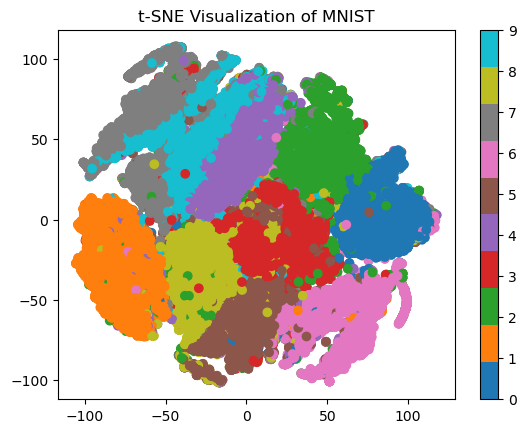

In [71]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


y = y.astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10')
plt.title('t-SNE Visualization of MNIST')
plt.colorbar() 
plt.show()
